## CSE 377 - Homework 04 

### Kevin Chen - CHEN146 - 113448049

In [1]:
# Importing the libraries to use in this homework assignment

import numpy as np
import PIL as pil
import matplotlib.pyplot as plt

## Task 01

### Load the input xray image from NIH website, calculate its normalized intensity histogram p_r (r_k). Show the image and plot its intensity histogram. 

In [2]:
# Converting the xray image into a numpy array to work with

input_img = pil.Image.open("./xray.jpg")
input_arr = np.array(input_img)

In [3]:
input_arr

array([[  0,   0,   0, ...,   6,   6,   5],
       [  1,   1,   1, ...,  13,  13,  13],
       [  2,   2,   2, ...,  12,  12,  12],
       ...,
       [  0, 122, 120, ..., 150, 150, 149],
       [  0, 125, 124, ..., 150, 150, 149],
       [  0, 125, 124, ..., 150, 150, 149]], dtype=uint8)

In [3]:
# Creating very own histogram by first creating an empty 1-D numpy array of zeros
# Using 256 as the size of the array since the pixel values can be [0,255] --> size 256 

un_norm_hist = np.zeros(256)
rows = input_arr.shape[0]
cols = input_arr.shape[1]

# Counting up the frequency of a pixel's intensity into the histogram

for row in range(rows):
    for col in range(cols):
        intensity = input_arr[row, col]
        un_norm_hist[intensity] += 1

# Normalizing the histogram by calculating its normalized intensity of p_r(r_k)
# p_r(r_k) = n_k / M*N, where M = number of rows, N = number of columns
# Currently only have n_k after the above for loop finishes running

norm_hist = un_norm_hist / (rows * cols)

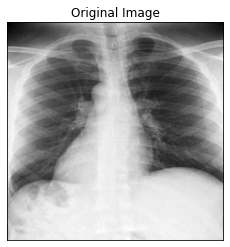

In [4]:
# Showing the original image

plt.title("Original Image")
plt.imshow(input_arr, cmap="gray")
plt.tick_params(left=False,right=False,labelleft=False,labelbottom=False,bottom=False)
plt.show()

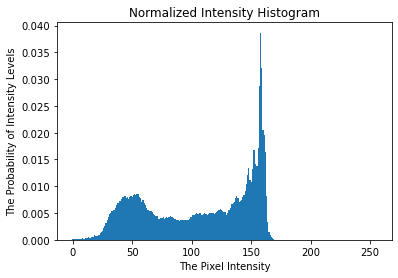

In [5]:
# Plotting the normalized intensity histogram as a bar graph 

plt.title("Normalized Intensity Histogram")
plt.bar(range(256), norm_hist, width=1.0)
plt.xlabel('The Pixel Intensity')
plt.ylabel('The Probability of Intensity Levels')
plt.show()

## Task 02 

### Calculate the cumulative distribution function (cdf) of p_r (r_k), i.e., cdf(r_k) = summation of j=0 to k of p_r (r_j), and plot it.

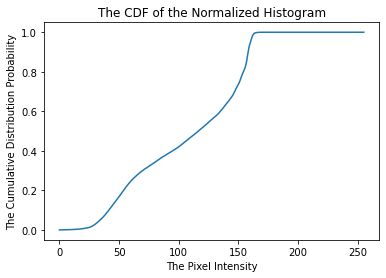

In [6]:
# Using the numpy function of cumsum to easily get the cumulative summation of the 
# normalized intensity histogram into a single variable

norm_cdf = np.cumsum(norm_hist)

# Plotting the cdf to the user.

plt.title("The CDF of the Normalized Histogram")
plt.plot(norm_cdf)
plt.xlabel('The Pixel Intensity')
plt.ylabel('The Cumulative Distribution Probability')
plt.show()

## Task 03

### Applying the intensity transformation function: s_k = T(r_k) = (L - 1) * cdf(r_k), where L = 256, to the input image, we will obtain the histogram-equalized output image. Visualize the output image.

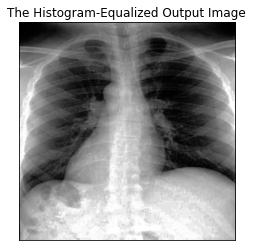

In [7]:
# Applying the intensity transformation function
# Using the input image's numpy array as an index of the norm_cdf array, can easily 
# apply a mathematical operation of multiplication by constant 255 aka L-1 or 256-1.
# Faster than using nested for loops.

hist_img = 255 * norm_cdf[input_arr]
hist_img = (np.rint(hist_img)).astype(int)

# Displaying the histogram-equalized output image.

plt.title('The Histogram-Equalized Output Image')
plt.imshow(hist_img, cmap='gray')
plt.tick_params(left=False,right=False,labelleft=False,labelbottom=False,bottom=False)
plt.show()

# I am able to notice that there is more detail in this image than the original image.
# Compared to the original image, this histogram-equalized image has a more defined
# spine in the image. There seems to be more contrast in this output image.

## Task 04

### Calculate the normalized intensity histogram of the output image and plot it.

In [8]:
# Creating an empty 1-D numpy array to store the frequency of intensity values of the output
# image. This will be not normalized, where we then would apply the formula to get it to
# be normalized, p(r_k) = n_k / M * N, where M is the number of rows and N is the number
# of columns. p(r_k) are estimates of the probabilities of the intensity levels occuring in an image.

output_hist = np.zeros(256)

# Finding the frequency of intensity values in the output image

for row in range(rows):
    for col in range(cols):
        intensity = hist_img[row, col]
        output_hist[intensity] += 1
        
# Normalizing the current array with the function provided above

norm_output_hist = output_hist / (rows * cols)

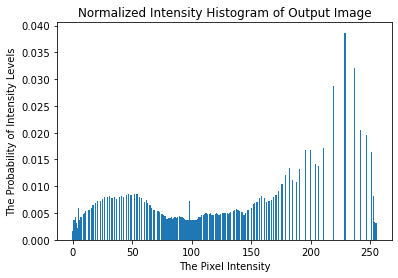

In [9]:
# Plotting the normalized intensity histogram of the output image p_s (r_s).

plt.title("Normalized Intensity Histogram of Output Image")
plt.bar(range(256), norm_output_hist, width=1.0)
plt.xlabel('The Pixel Intensity')
plt.ylabel('The Probability of Intensity Levels')
plt.show()